<a href="https://colab.research.google.com/github/nikibhatt/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/NB_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('googleplaystore.csv')
print(df.shape)

In [124]:
df.describe()

,Rating,Reviews,Installs,Price,Content Rating NUM,Category NUM
count,9133.000000,9.133000e+03,9.133000e+03,9133.000000,9133.000000,9133.000000
mean,4.176698,2.493731e+05,7.124012e+06,1.185543,1.449250,16.503887
std,0.500871,1.717315e+06,4.622321e+07,17.367113,0.992621,8.243363
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,4.100000,2.200000e+01,1.000000e+03,0.000000,1.000000,11.000000
50%,4.200000,7.420000e+02,1.000000e+05,0.000000,1.000000,14.000000
75%,4.500000,2.517200e+04,1.000000e+06,0.000000,1.000000,24.000000
max,5.000000,4.489389e+07,1.000000e+09,400.000000,4.000000,32.000000


Hypothesis: Number of installs for most popular(top 10) 'Teen' apps will far exceed the number of installs for most popular(top 10) 'non-Teen' apps

In [0]:
df_original = df

# Data cleaning for "Size" column
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)
# Data cleaning for "Installs" column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))
# Data cleaning for "Price" column
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())
# Row 10472 removed due to missing value of Category
df.drop(df.index[10472], inplace=True)
# Row [7312,8266] removed due to "Unrated" value in Content Rating
df.drop(df.index[[7312,8266]], inplace=True)

In [0]:
df.head(25)

In [0]:
# Sort by "Category"
df.sort_values("Category", inplace = True)

In [5]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
df["Category NUM"] = lb_make.fit_transform(df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

In [0]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
# Rounding the mean value to 1 decimal place
df['Rating'].round(1)
df.dropna(axis=0, inplace=True)

In [0]:
# Change datatype
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [0]:
df_teen = df[df['Content Rating NUM'] == 4]
df_non_teen = df[df['Content Rating NUM'] != 4]

In [0]:
df_grouped_by_category_num = df.groupby('Category NUM')
df_grouped_by_category_num.head()

In [0]:
options = ['GAME', 'FAMILY', 'COMMUNICATION', 'NEWS_AND_MAGAZINES', 'TOOLS', 'PRODUCTIVITY', 'PHOTOGRAPHY', 'SHOPPING', 'SPORTS', 'PERSONALIZATION']

short_df = df[df['Category'].isin(options)]

In [0]:
df_sum_installs_for_category = []
for x in short_df['Category NUM'].unique():
  df_sum_installs_for_category.append({'Category NUM': x, 'Sum Installs' : df.loc[df['Category NUM'] == int(x), 'Installs'].sum()})
df_sum_installs_for_category

In [0]:
df_sum_installs_for_category = pd.DataFrame(df_sum_installs_for_category)

In [0]:
df_sum_installs_for_category.sort_values(by=['Sum Installs'], ascending=False, inplace=True)

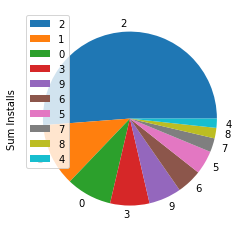

In [65]:
df_sum_installs_for_category.plot.pie(y='Sum Installs')

In [76]:
len(short_df.loc[df['Price'] == 1.29])

1

In [0]:
df_price_distribution = []
for x in short_df['Price'].unique():
  df_price_distribution.append({'Price' : x, 'Number of Apps': len(short_df.loc[df['Price'] == x])})
df_price_distribution = pd.DataFrame(df_price_distribution)

In [0]:
df_price_distribution.sort_values(by=['Number of Apps'], ascending=False, inplace=True)

In [0]:
df_price_distribution.head(25)

In [0]:
df_price_distribution['Number of Apps'] >= 10

In [0]:
short_df_price = df_price_distribution[df_price_distribution['Number of Apps'] >= 10]

In [0]:
short_df_price = pd.DataFrame(short_df_price)
short_df_price.sort_values(by=['Price'], ascending=False, inplace=True)

In [108]:
short_df_price

,Number of Apps,Price
12,10,9.99
2,51,4.99
4,30,3.99
5,90,2.99
7,17,2.49
6,54,1.99
3,39,1.49
1,117,0.99
0,4988,0.00


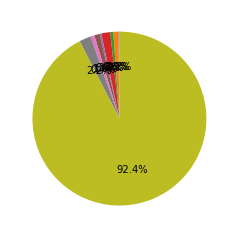

In [120]:
#plt.bar(short_df_price['Price'], short_df_price['Number of Apps'])
plt.pie(short_df_price['Number of Apps'],  startangle=90, autopct='%.1f%%');

In [0]:
bins = numpy.linspace(0, 1, 25)
bin_means = (numpy.histogram(df_price_distribution, bins, weights=data)[0] /
             numpy.histogram(data, bins)[0])

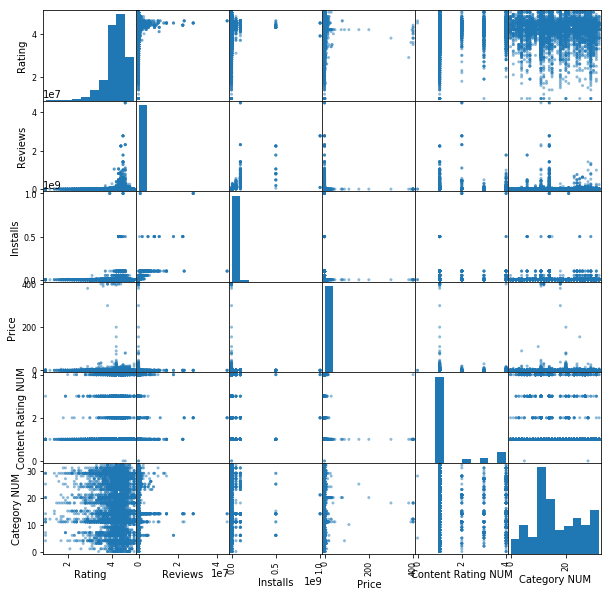

In [0]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

In [0]:
df.plot.hist(bin=10,alpha= 0.5);

In [0]:
import pandas_profiling 
df.profile_report()

In [0]:
import seaborn as sns
sns.pairplot(df)

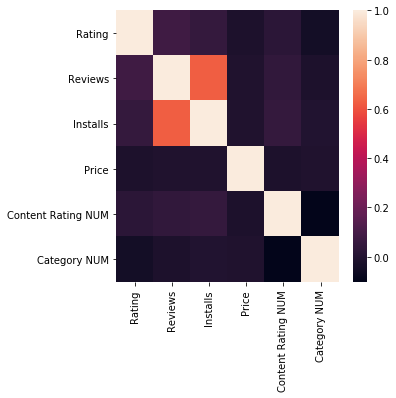

In [0]:
plt.figure(figsize = (5, 5))
sns.heatmap(df.corr())

plt.show()